In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import plotly.express as px

In [3]:
churn_data = pd.read_csv('../data/bank_churn.csv')
churn_data.drop('RowNumber', axis=1, inplace=True)
churn_data['Exited_str'] = churn_data['Exited'].apply(lambda x: 'Ушедший' if x else 'Лояльный')
display(churn_data.head())

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_str
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Ушедший
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Лояльный
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Ушедший
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Лояльный
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Лояльный


In [46]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


#### Задание 1

Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

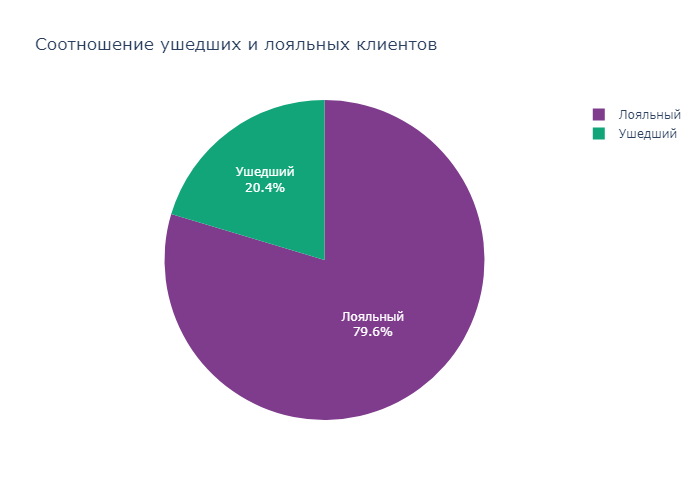

In [4]:
loyality_data = churn_data['Exited_str'].value_counts().rename_axis('Exited').reset_index(name='counts')

fig = px.pie(
    data_frame=loyality_data,
    values='counts',
    names='Exited',
    title='Соотношение ушедших и лояльных клиентов',
    width=700,
    height=500,
    color_discrete_sequence=px.colors.qualitative.Bold,
    labels = {'Ушедший': 'Лояльность', 'counts': 'Количество клиентов'}
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show("png")


На графике видно, что лояльных клиентов гораздо больше, чем ушедших (почти в 4 раза). В числовом выражении 7963 против 2037. На текущий момент ушел каждый пятый клиент, 20% оттока - это довольно высокий показатель, следует проанализировать причины ухода клиентов.

Также для получения этой информации можно было бы сформировать гистограмму.

#### Задание 2

Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

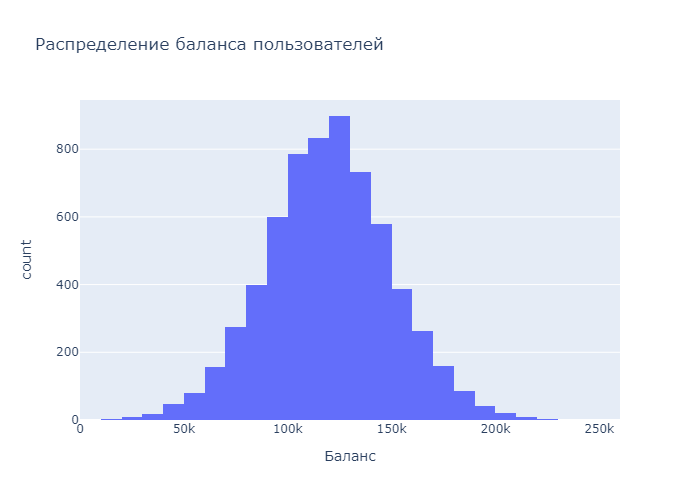

In [5]:
big_balance_data = churn_data[churn_data['Balance'] > 2500]

fig = px.histogram(
    data_frame=big_balance_data,
    x='Balance',
    title='Распределение баланса пользователей',
    nbins=30,
    labels = {'Balance': 'Баланс'}
)
fig.show("png")

Большинство пользователей с балансом > 2500 имеют баланс в интервале от 80 до 160 тысяч (около 5200 пользователей). Из этого следует, что пользуются услугами банка преимущественно пользователи с большими суммами накоплений.

Также есть один пользователь с балансом более 250 тыс. Это максимальное значение в выборке.
Пользователей с совсем крупными суммами (более 160 тыс) гораздо меньше. Это может означать, что либо обладателей таких сумм не так много, либо такие крупные суммы пользователи предпочитают не хранить в банках, а вкладывать в нечто другое.

Если убрать ограничение в 2500, на графике будет видно, что более 3500 пользователей имеют нулевой баланс.

#### Задание 3

Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

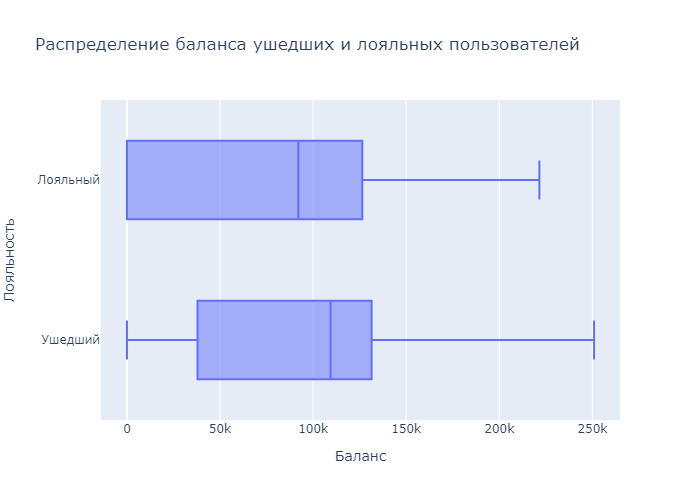

In [6]:
fig = px.box(
    data_frame=churn_data,
    x='Balance',
    y='Exited_str',
    title='Распределение баланса ушедших и лояльных пользователей',
    labels = {'Exited_str': 'Лояльность', 'Balance': 'Баланс'}
)
fig.show("png")

По графику видно, что уходят клиенты с бо`льшим балансом в среднем (медиана у лояльных меньше, чем у ушедших). Возможно, это говорит о невыгодных условиях банка. Об этом может свидетельствовать и то, что более, чем 25% лояльных клиентов не держат денег на счете (25 квартиль = 0). Возможно, клиентам выгоднее уйти в другой банк, либо вложить средства в нечто другое. 

У большинства ушедших клиентов остались средства на счете (у 50% от 38 до 131 тысячи). Если данные верны, то, возможно, их еще можно вернуть.

#### Задание 4

Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

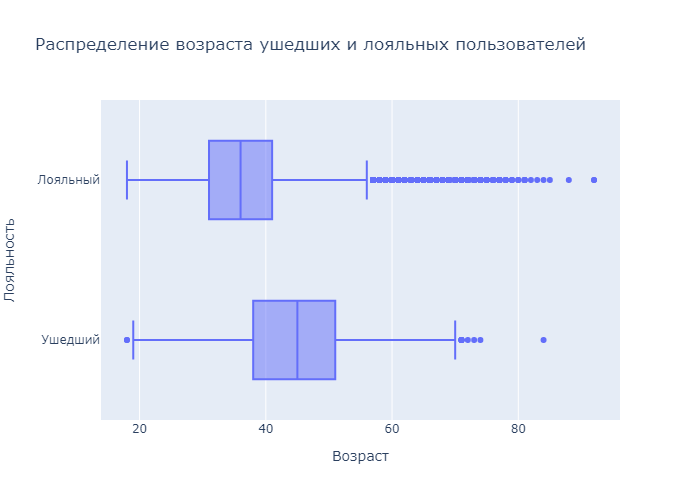

In [7]:
fig = px.box(
    data_frame=churn_data,
    x='Age',
    y='Exited_str',
    title='Распределение возраста ушедших и лояльных пользователей',
    labels = {'Exited_str': 'Лояльность', 'Age': 'Возраст'}
)
fig.show("png")

По графику видно, что уходят клиенты более высокой возрастной категории (медиана у лояльных меньше, чем у ушедших). Минимум половина лояльных находится в интервале от 31 до 41 года. Ушедшие же в интервале от 38 до 51 года. 

Возможно, это говорит о том, что с возрастом требуются доп.расходы (снижается здоровье, снижается заработок в предпенсионном возрасте). Стоит проанализировать вместе с предполагаемым доходом и суммой баланса. Либо о том, что клиенты с возрастом начинают ответственнее относиться к деньгам и ищут более выгодные условия.

Т.о. при анализе причин и принятии мер по уменьшению оттока следует сфокусироваться на клиентах старше 38 лет

Потенциальных выбросов больше среди лояльных клиентов. Это единичные клиенты от 57 до 92 лет.

#### Задание 5

Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

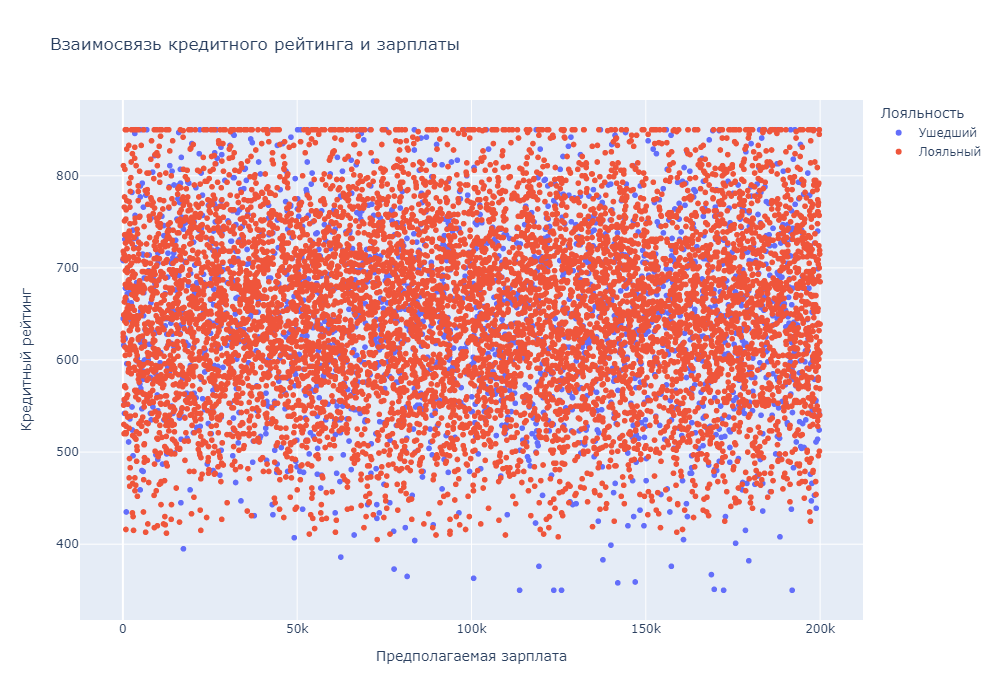

In [8]:
fig = px.scatter(
    data_frame=churn_data, 
    x = 'EstimatedSalary',
    y = 'CreditScore', 
    color='Exited_str', 
    # log_x=True, 
    # log_y=True,
    width=1000,
    height=700,
    title='Взаимосвязь кредитного рейтинга и зарплаты',
    labels = {'Exited_str': 'Лояльность', 'CreditScore': 'Кредитный рейтинг', 'EstimatedSalary': 'Предполагаемая зарплата'}
)

fig.show("png")

Взаимосвязи между предполагаемым заработком и кредитным рейтингом не наблюдается.
На графике можно увидеть только то, что кредитный рейтинг большинства клиентов колеблется между 500 и 750 баллами. 

Максимальное значение - 850. Видимо, использовалась старая шкала кредитного рейтинга.
Наблюдается скопление лояльных клиентов с рейтингом 850. 

#### Задание 6

Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

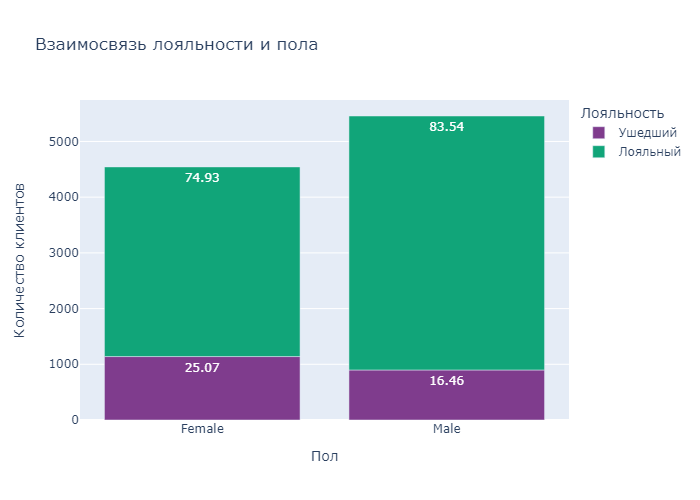

In [10]:
gender_data = churn_data.groupby(['Gender', 'Exited_str'], as_index=False).CustomerId.count().sort_values('Exited_str', ascending=False)
gender_data.rename(columns = {'CustomerId':'Count'}, inplace = True)
common_gender_data = gender_data.groupby('Gender', as_index=False).Count.sum()
common_gender_data.rename(columns = {'Count':'Common_count'}, inplace = True)
gender_data = gender_data.merge(common_gender_data, on=['Gender'])
gender_data['Percent'] = round(gender_data['Count']*100/gender_data['Common_count'], 2)

fig = px.bar(
    data_frame=gender_data,
    x='Gender',
    y='Count',
    title='Взаимосвязь лояльности и пола',
    color='Exited_str',
    text = 'Percent',
    labels = {'Gender': 'Пол', 'Count': 'Количество клиентов', 'Exited_str': 'Лояльность',},
    height=500,
    width=700,
    color_discrete_sequence=px.colors.qualitative.Bold,
)
fig.show("png")

Вывела ушедших и лояльных клиентов в количественном выражении с указанием % от общего кол-ва. Можно было ограничиться столбчатой диаграммой с 2-мя столбцами %.

На графике видно, что общее кол-во женщин среди клиентов банка меньше, чем мужчин (3404 против 4559). Однако и %, и абсолютное количество ушедших женщин выше (25% (1139) против 16.5 % (898)).
Возможно, это связано с тем, что женщины более склонны к тратам. 

#### Задание 7

Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

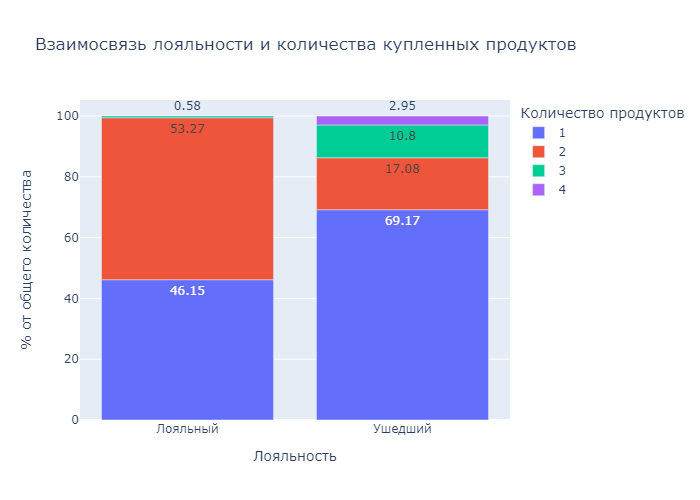

In [11]:
products_data = churn_data.groupby(['NumOfProducts', 'Exited_str'], as_index=False).CustomerId.count()
products_data.rename(columns = {'CustomerId':'Count'}, inplace = True)
common_products_data = products_data.groupby('Exited_str', as_index=False).Count.sum()
common_products_data.rename(columns = {'Count':'Common_count'}, inplace = True)
products_data = products_data.merge(common_products_data, on=['Exited_str'])
products_data['Percent'] = round(products_data['Count']*100/products_data['Common_count'], 2)
products_data['NumOfProducts'] = products_data['NumOfProducts'].astype('str')

fig = px.bar(
    data_frame=products_data,
    x='Exited_str',
    y='Percent',
    color="NumOfProducts",
    title='Взаимосвязь лояльности и количества купленных продуктов',
    text = 'Percent',
    labels = {'Exited_str': 'Лояльность', 'Percent': '% от общего количества', 'NumOfProducts': 'Количество продуктов'},
    height=500,
    width=700,
)
fig.show("png")

Практически все клиенты, имеющие 3-4 продукта, ушли. Хотя ценность таких клиентов высока. Возможно, иметь 3-4 продукта в этом банке невыгодно, нужны какие-то особые условия для таких клиентов.

Также среди ушедших много тех, кто имеет только 1 продукт. Возможно, это клиенты, которые планировали положить деньги на счет только на 1 период для накопления или просто брали кредит. Либо нашли более выгодные условия в другом банке.

#### Задание 8

Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

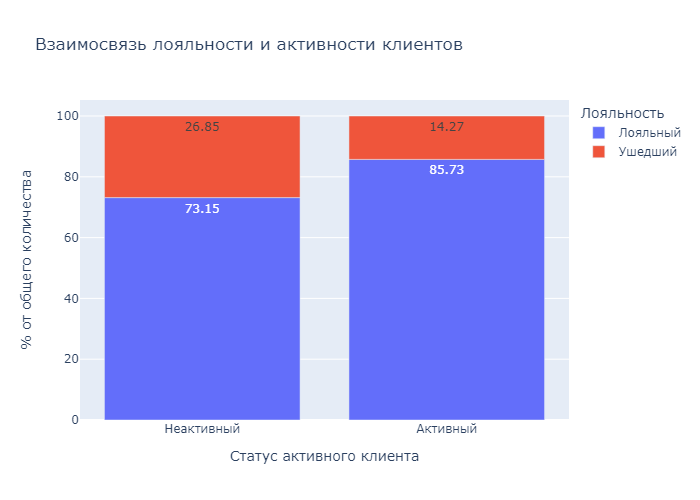

In [12]:
activity_data = churn_data.groupby(['IsActiveMember', 'Exited_str'], as_index=False).CustomerId.count()
activity_data.rename(columns = {'CustomerId':'Count'}, inplace = True)
common_activity_data = activity_data.groupby('IsActiveMember', as_index=False).Count.sum()
common_activity_data.rename(columns = {'Count':'Common_count'}, inplace = True)
activity_data = activity_data.merge(common_activity_data, on=['IsActiveMember'])
activity_data['Percent'] = round(activity_data['Count']*100/activity_data['Common_count'], 2)
activity_data['IsActiveMember'] = activity_data['IsActiveMember'].apply(lambda x: 'Активный' if x else 'Неактивный')

fig = px.bar(
    data_frame=activity_data,
    x='IsActiveMember',
    y='Percent',
    color="Exited_str",
    title='Взаимосвязь лояльности и активности клиентов',
    text = 'Percent',
    labels = {'Exited_str': 'Лояльность', 'Percent': '% от общего количества', 'IsActiveMember': 'Статус активного клиента'},
    height=500,
    width=700,
)
fig.show("png")

Среди активных клиентов меньший % ушедших. Возможно, для банка должна быть сигналом низкая активность клиентов, чтобы принять какие-то меры до их ухода (это могут быть акции, спец.условия, рассылки, кешбек за покупки и прочее).

#### Задание 9

В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

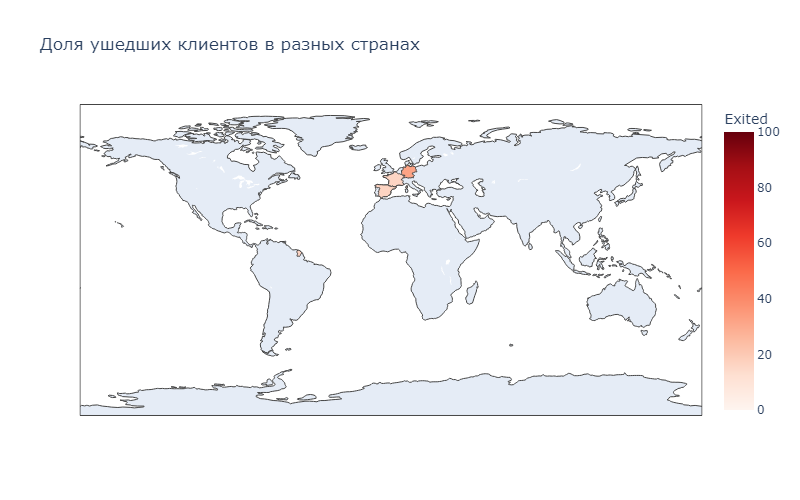

In [13]:
country_data = churn_data.groupby('Geography', as_index=False).Exited.mean()
country_data['Exited'] = country_data['Exited'] * 100

fig = px.choropleth(
    data_frame=country_data,
    locations="Geography",
    locationmode = "country names",
    color="Exited",
    range_color=[0, 100],
    title='Доля ушедших клиентов в разных странах',
    width=800,
    height=500,
    color_continuous_scale='Reds'
)

fig.show("png")

Международный банк работает только в 3-х странах, либо данные были предоставлены только о клиентах в этих странах.
Процент ушедших в Германии (32%) в 2 раза выше, чем в других странах. Такой % оттока является критичным.

Возможно, банковская сфера в Германии более конкурентноспособна. Стоит проанализировать количество ушедших в абсолютном выражении. Если оно сопоставимо с количеством клиентов в других странах, то, возможно, в первую очередь следует сосредоточиться на уменьшении оттока именно в Германии. 

#### Задание 10

Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

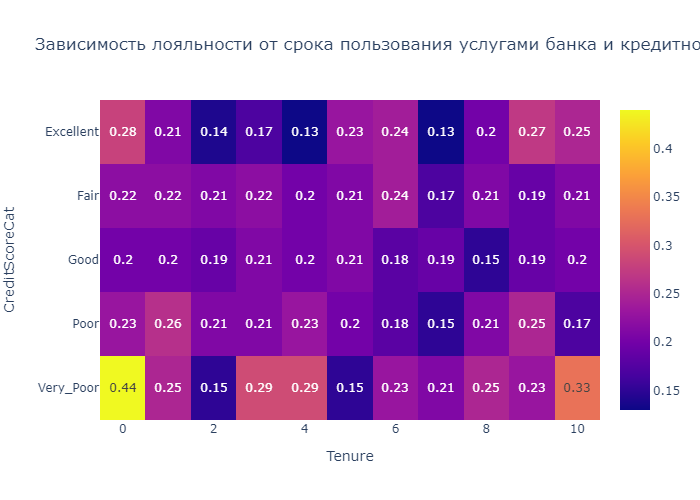

In [14]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
pivot = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean',
    fill_value=0
).round(2)

fig = px.imshow(
    pivot,
    text_auto=True,
    aspect="auto",
    title='Зависимость лояльности от срока пользования услугами банка и кредитного рейтинга'
)
fig.show("png")

Чаще других уходят клиенты с низким кредитным рейтингом, что закономерно, т.к. банк может ограничивать доступные таким клиентам услуги. Причем особенно часто те, которые только начали работать с банком, а также которые работают уже 10 лет.

Люди, которые только начали работать с банком, возможно, уходят, т.к. банк отказывается выдавать займы с таким низким рейтингом. Странно, что клиенты, сотрудничающие с банком 10 лет, имеют такой низкий кредитный рейтинг. Возможно, они в какой-то момент стали неплатежеспособными. 

Также чуть чаще уходят клиенты с самым высоким рейтингом, которые только пришли. Возможно, это связано с невыгоднями условиями банка.